# Unsupervised Learning Clustering and Dimension Reduction Project
## Clustering Cocktail Recepies by Jakub Bandurski

## Table of contents:

###1.Prerequisites

###2.Data and EDA

###3.Clustering

3.1.   KMeans

3.2.   PAM

3.3. DBSCAN

3.4. tSNE

###4.Dimension Reduction

4.1. PCA

4.2. MDS

4.3. tSNE

###5.Clustering after DR

5.1. KMeans with PCA

5.2. DBSCAN with tSNE

###6. Summary







### Prerequisites - setting up the environment

In [ ]:
#Allowing Google Colab to connect to the drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Installing missing packages
!pip install scikit-learn-extra

In [2]:
#Importin essential packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

#Data and EDA
  The idea of this project is to use methods learnt during Unsupervised Learning course for clustering cokctail recepies. We can represent every cocktail by a list of ingredients with values of parts. For instance Gin and Tonic would be represented as 2 parts gin and 5 parts tonic, likewise Aviation would be 2 parts Gin, 1/2 parts Maraschino, 1/4 creme de violette, 3/4 parts lemon juice.

  The data set used in this project comes from [github repository](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-05-26) of Tidy Tuesday. The dataset has been pivoted and normalised to parts instead of absolute units with help of this  [blog post](https://www.martincadek.com/posts/tidy-analysis-of-cocktails-part-i/
).

  Each row of the dataset represents one cocktail. Each column has appropriate part values of one ingredient. As a result the data frame is a sparse matrix with dimensions 546 by 314.

In [8]:
# Importing dataset
cocktails = pd.read_csv(
    '/content/drive/MyDrive/Unsupervised Learning/cocktails_clustering/cocktails_ready.csv')
cocktails = cocktails.drop(columns=["row_id"])
columns = cocktails.columns

# Dictionary of cocktails names
cocktails_dict = pd.read_csv('/content/drive/MyDrive/Unsupervised Learning/cocktails_clustering/cocktails_raw.csv')
cocktails_dict = list(cocktails_dict['drink'].unique())
del cocktails_dict[407]

In [9]:
# Checking that all dtypes are integer or numeric
pd.set_option('display.max_rows', 315)
cocktails.dtypes
pd.set_option('display.max_rows', 60)
# all are numeric
display(cocktails.shape)

(546, 314)

In [ ]:
#Presenting basic statistics
pd.set_option('display.max_rows', 315)
display(cocktails.describe().transpose())
pd.set_option('display.max_rows', 60)

,count,mean,std,min,25%,50%,75%,max
Creme.de.Cacao,546.0,0.016484,0.136984,0.0,0.0,0.0,0.0,2.000000
Vodka,546.0,3.609737,74.948917,0.0,0.0,0.0,0.0,1750.000000
Absolut.Kurant,546.0,0.009615,0.175374,0.0,0.0,0.0,0.0,4.000000
Amaretto,546.0,0.081197,0.352934,0.0,0.0,0.0,0.0,4.000000
Chambord.raspberry.liqueur,546.0,0.015720,0.168853,0.0,0.0,0.0,0.0,3.000000
Cranberry.juice,546.0,0.073718,0.471374,0.0,0.0,0.0,0.0,5.000000
Grand.Marnier,546.0,0.016331,0.158196,0.0,0.0,0.0,0.0,3.000000
Malibu.rum,546.0,0.017857,0.152282,0.0,0.0,0.0,0.0,2.000000
Midori.melon.liqueur,546.0,0.011600,0.101932,0.0,0.0,0.0,0.0,1.500000
Pineapple.juice,546.0,0.158883,2.041554,0.0,0.0,0.0,0.0,46.000000


The task of describing all 314 columns is rather tedious. To sum up we can se one clear outlier which is Everclear column. Further investigation shows that there has been an error in the conversion. 
the Pink Penocha Punch had its units converted incorrectly to ml and galons at the same time. In order to neglect the impact I decided to remove this row.

In [ ]:
display(cocktails[cocktails['Everclear'] > 0]['Everclear'],
        pd.set_option('display.max_rows', 315),
        cocktails.loc[407,]
        )
pd.set_option('display.max_rows', 60)
cocktails = cocktails.drop([407],axis=0).reset_index(drop=True)

136      2
163      1
216      1
407    750
Name: Everclear, dtype: int64

None

Creme.de.Cacao                   0.0
Vodka                         1750.0
Absolut.Kurant                   0.0
Amaretto                         0.0
Chambord.raspberry.liqueur       0.0
Cranberry.juice                  1.0
Grand.Marnier                    0.0
Malibu.rum                       0.0
Midori.melon.liqueur             0.0
Pineapple.juice                  0.0
Lager                            0.0
Tequila                          0.0
X151.proof.rum                   0.0
Coconut.liqueur                  0.0
Cointreau                        0.0
Dark.Creme.de.Cacao              0.0
Light.rum                        0.0
Milk                             0.0
Vanilla.ice.cream                0.0
Dark.rum                         0.0
Orange.juice                     1.0
Goldschlager                     0.0
Jägermeister                     0.0
Rumple.Minze                     0.0
Wild.Turkey                      0.0
Jack.Daniels                     0.0
Jim.Beam                         0.0
J

We should not forget about scaling the data set as it is crucial for many clustering methods as well as dimension reduction techniques.

In [ ]:
#scaling
scaler = preprocessing.StandardScaler().fit(cocktails)
cocktails = pd.DataFrame(scaler.transform(cocktails))
cocktails.columns = columns
cocktails

,Creme.de.Cacao,Vodka,Absolut.Kurant,Amaretto,Chambord.raspberry.liqueur,Cranberry.juice,Grand.Marnier,Malibu.rum,Midori.melon.liqueur,Pineapple.juice,...,Ouzo,Aquavit,Yukon.Jack,Agave.syrup,Tomato.Juice,Maple.syrup,Lillet.Blanc,Limeade,White.Rum,Zima
0,7.179689,0.179588,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
1,-0.120554,-0.122419,2.796131,0.477888,1.387317,0.911185,1.476914,1.524235,2.338633,0.044489,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
2,-0.120554,-0.122419,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
3,-0.120554,-0.122419,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,3.165950,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
4,-0.120554,0.179588,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.120554,-0.122419,-0.054929,5.436567,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
541,-0.120554,-0.122419,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
542,-0.120554,-0.122419,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,-0.052016,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069
543,-0.120554,0.255089,-0.054929,-0.230495,-0.093273,-0.153329,-0.103423,-0.117481,-0.114006,-0.077968,...,5.617690,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.042875,-0.06069


Before moving on we should check if there a highly correlated features in our dataset. We can visualise it with a heatmap, which is shown below. Interestingly there is no negative correlation between any variables.

We can see several bright dots - high absolute values of Pearson correlation index. Fortunately most of the matrix entries are dark meaning lack of correlation.

We can proceed with removing one column from each pair of Pearson correlation index higher than 95%.



Text(0.5, 1.0, 'Correlation Heatmap')

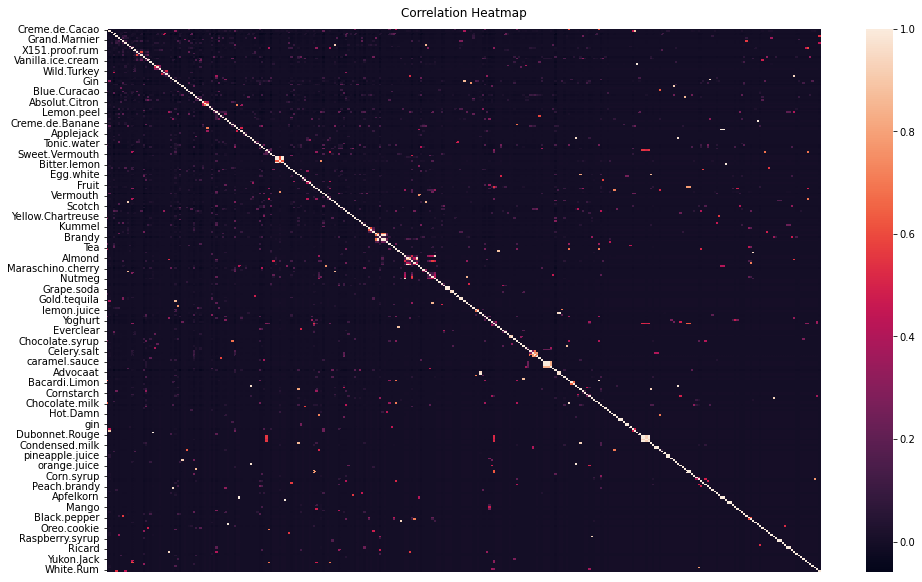

In [ ]:
#correlation
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(cocktails.corr(),xticklabels=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
#removing corelated features
triangle_cor = cocktails.corr().where(np.triu(np.ones(cocktails.corr().shape),
                                              k=1).astype(bool))
cor = triangle_cor.abs().unstack().sort_values(kind="quicksort").reset_index()
dif = cor['level_0']!=cor['level_1']
filter = (dif) & (cor[0]>0.95) & (cor[0]!=np.nan)
to_drop = cor[filter].sort_values(by=[0],ascending=False)['level_0']
cocktails = cocktails.drop(to_drop, axis=1)
cocktails.shape

(545, 283)

# Clustering
## KMeans
We can start clustering process with KMeans algorithm which is very quick and may provide general overview of the clusterability of the data.

We are ging to use both Silhouette and Caliński-Harbaasz measures as guidelines.

In [ ]:
#Kmeans
silhouette = []
harabasz = []

for k in range(2,50):
    np.random.seed(1234)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cocktails)
    silhouette.append(silhouette_score(cocktails, labels=kmeans.labels_, 
                                       metric='euclidean'))
    harabasz.append(calinski_harabasz_score(cocktails, labels=kmeans.labels_))

We start by performing KMeans algorithm trials with k in the range of 2 to 50. It can be clearly seen that both Silhouette and Caliński-Harabasz indicate different optimal values of k. 

Silhouette:
*   As usual we can see biggest value for k=2, which should be neglected as a known artifact of Silhouette measure
*   After initial fluctuations Silhouette plateaus for k values 28 - 33
*   This plateau is followed by sudden drop in the measure value which indicates that one of the above k values should be considered - 33
* Additionaly we can take 12 into consideration

Caliński-Harabasz:
* Again we can see biggest value for k=2, which should be neglected
* In this case we do not see a precise cutoff value that could be taken into account
* We can proceed by choosing both k value 13 and 21 as the highest measure values different than 2.

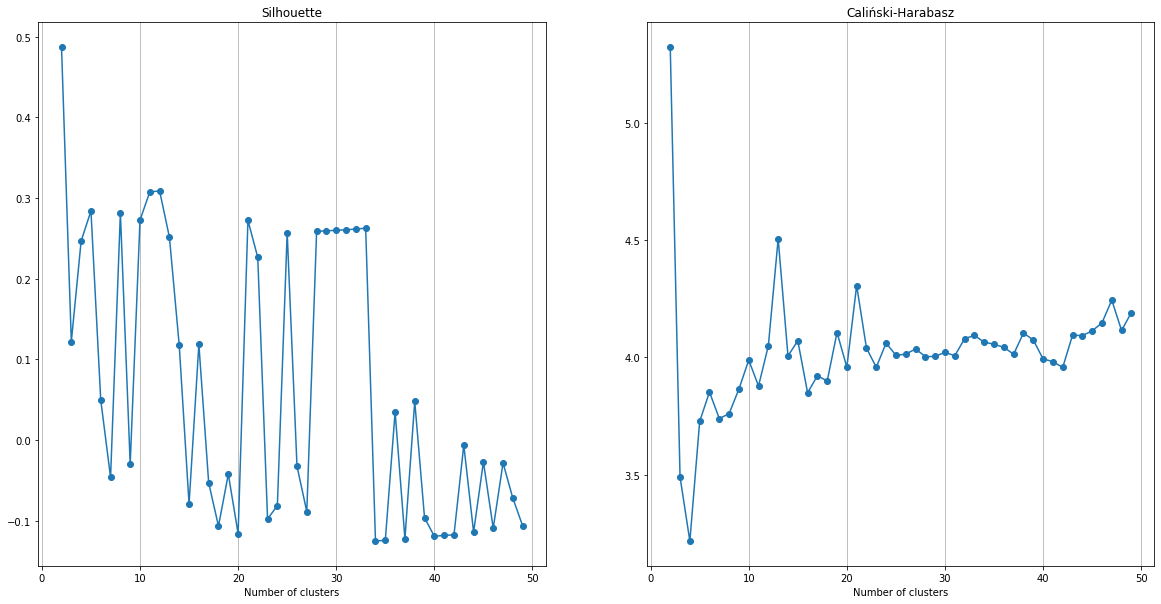

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(range(2,50), silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.grid(axis = 'x')

plt.subplot(1, 2, 2)
plt.plot(range(2,50), harabasz, marker='o')
plt.title('Caliński-Harabasz')
plt.xlabel('Number of clusters')
plt.grid(axis = 'x')
plt.show()

In order to better understand the situation in the quantitative sense we can display exact measure values for chosen k values 12, 13, 21, 33.

We can proceed with choosing k value 21 as it most consistent along the two measures used as guidelines.

In [ ]:
#Chosen model
candidates = [12, 13, 21, 33]
silhouette = []
harabasz = []
for k in candidates:
  np.random.seed(1234)
  kmeans = KMeans(n_clusters=k)
  label = kmeans.fit_predict(cocktails)
  silhouette.append(silhouette_score(cocktails, labels=kmeans.labels_, metric='euclidean'))
  harabasz.append(calinski_harabasz_score(cocktails, labels=kmeans.labels_))
print('k: ')
print(*candidates, sep=", ")
print('Sillhouette: ')
print(*silhouette, sep=', ')
print('Celiński-Harabasz: ')
print(*harabasz, sep=', ')

k: 
12, 13, 21, 33
Sillhouette: 
0.3086227960913528, 0.25126181170415757, 0.27231499063259484, 0.2625150023726951
Celiński-Harabasz: 
4.049446927922969, 4.50565938764699, 4.305949727695075, 4.09335851835265


With use of PCA projection we can visualise clustering on a 2d plot.

From this view we can presume that clusters are disproportional with one cluster (green) dominating over others.

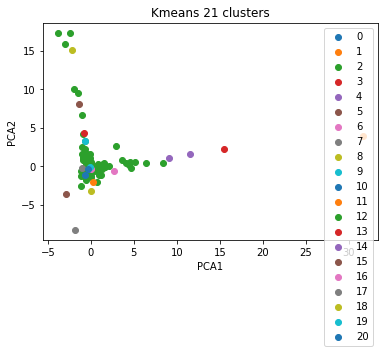

In [ ]:
#Visualisation
np.random.seed(1234)
kmeans = KMeans(n_clusters=21)
label = kmeans.fit_predict(cocktails)
pca = PCA(n_components=2)
cocktails_pca = pca.fit_transform(cocktails)
cocktails_pca = pd.DataFrame(cocktails_pca)
cocktails_pca['label'] = label

for i in range(0,21):
  plt.scatter(cocktails_pca.loc[cocktails_pca.label==i,0],
              cocktails_pca.loc[cocktails_pca.label==i,1], label=i)
plt.legend()
plt.title("Kmeans 21 clusters")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

After counting number of observations in each cluster we can see that one cluster has 96% of the data and the rest is clustered seperatly.

Cocktails data set used in this project exposes one of the weaknesses of the KMeans algorithm - sensitivity to outliers. In order to neglect their effect on the end result we will examine PAM algrithm (KMedoids).

In [ ]:
proportions = []
for i in range(0,21):
  proportions.append(cocktails_pca[(cocktails_pca['label'] ==i)]['label'].count())
proportions

[2, 1, 524, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

##PAM
Initial trials of PAM algorithm with k values up to 50, 100, 150 yielded upward trend of both Silhouette and Caliński-Harabasz measures. As the process becomes more time consuming with additional k values included I decided to stop at 200.


Silhouette:
*   We can still observe an upward trend of measure values.
*   There are characteristic sudden decreases in value
*   Value becomes positive only for k around 175 and higher which suggest poor performance of the model

Caliński-Harabasz:
* We can still observe an upward trend of measure values.
* This trend looks similar to exponential growth



In [ ]:
#KMedoids (PAM)
silhouette = []
harabasz = []

for k in range(2,200):
    kmedoids = KMedoids(n_clusters=k, random_state=1234, metric='euclidean',
                        method='pam').fit(cocktails)
    silhouette.append(silhouette_score(cocktails, labels=kmedoids.labels_,
                                       metric='euclidean'))
    harabasz.append(calinski_harabasz_score(cocktails, labels=kmedoids.labels_))


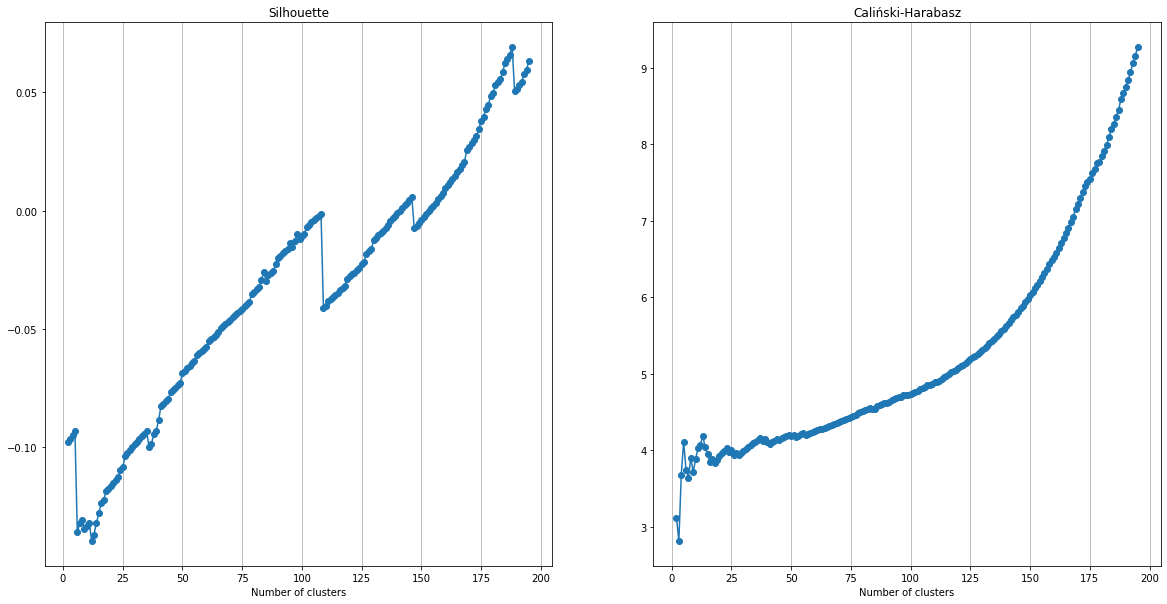

In [ ]:
#PAM measures
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(range(2,196), silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.grid(axis = 'x')

plt.subplot(1, 2, 2)
plt.plot(range(2,196), harabasz, marker='o')
plt.title('Caliński-Harabasz')
plt.xlabel('Number of clusters')
plt.grid(axis = 'x')
plt.show()

In order to incorporate positive Silhouette vale and at the same time take its highest value we proceed with k = 194. In this case Caliński-Harabasz measure is already rather high.


/usr/local/lib/python3.8/dist-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


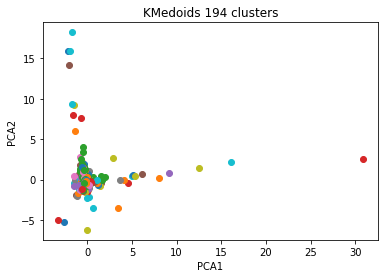

In [ ]:
#Visualisation
kmedoids = KMedoids(n_clusters=194, random_state=1234, metric='euclidean',
                    method='pam').fit(cocktails)
pca = PCA(n_components=2)
cocktails_pca = pca.fit_transform(cocktails)
cocktails_pca = pd.DataFrame(cocktails_pca)
cocktails_pca['label'] = kmedoids.labels_

for i in range(0,194):
  plt.scatter(cocktails_pca.loc[cocktails_pca.label==i,0],
              cocktails_pca.loc[cocktails_pca.label==i,1], label=i)
# plt.legend()
plt.title("KMedoids 194 clusters")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
proportions = []
for i in range(0,194):
  proportions.append(cocktails_pca[(cocktails_pca['label'] ==i)]['label'].count())
print(sum(proportions))
print('number of observations in cluster,   number of such clusters')
Counter(proportions).most_common()

545
number of observations in cluster,   number of such clusters


[(1, 149),
 (2, 14),
 (3, 11),
 (4, 5),
 (6, 3),
 (17, 2),
 (11, 2),
 (14, 2),
 (8, 2),
 (5, 1),
 (13, 1),
 (22, 1),
 (157, 1)]

As expected Partitioning Around Medoids algorithm neglects outlier observations more than KMeans. We can see that proportions of clusters become more normalised.

There exists a center cluster with 157 observations which is significantly less than in the case od KMeans. 149 outliers have been deteced and clustered as singletons. Rest of the clusters are more or less balanced.

As DBSCAN is known for detecting cumbersome cluster shapes we can try if it generates even better results than PAM.


##DBSCAN
The DBSCAN method is characterised by several paramaters which can be tuned to fit it to the dataset. Most important ones are eps (ɛ-neighborhood) and min_samples (minimal number of observations in a cluster).

As shown above by KMeans and PAM algorithms we can expect lots of clusters with 1 or 2 members. Hence we will perform two epsilon optimalisations with min_samples ∈ {1,2}.

We check epsilon values form 0.001 to 37.5 (higher values yeild algorithm error). Basing on Silhouette and Caliński-Harabasz measures we choose to inestigate range of 0.5 to 25.

Notice that DBSCAN does not have apriori knowledge of number of clusters - this is determined druing the algorithm runtime. Therfore, we add third plot which displays number off clusters for each epsilon value.




silhouette:  [0.0513761211813714, 0.0513761211813714, 0.05855693789068783, 0.07038350152861719, 0.10896003532368957, 0.30889513245970673, 0.484808387077604]
harabasz:  [6.603549471760008e+33, 6.603549471760008e+33, 2463441.990242572, 3194.8538229302985, 8.643890915810621, 4.401623939051266, 5.276481675680679]
n_clusters:  [525, 525, 523, 512, 248, 51, 2]


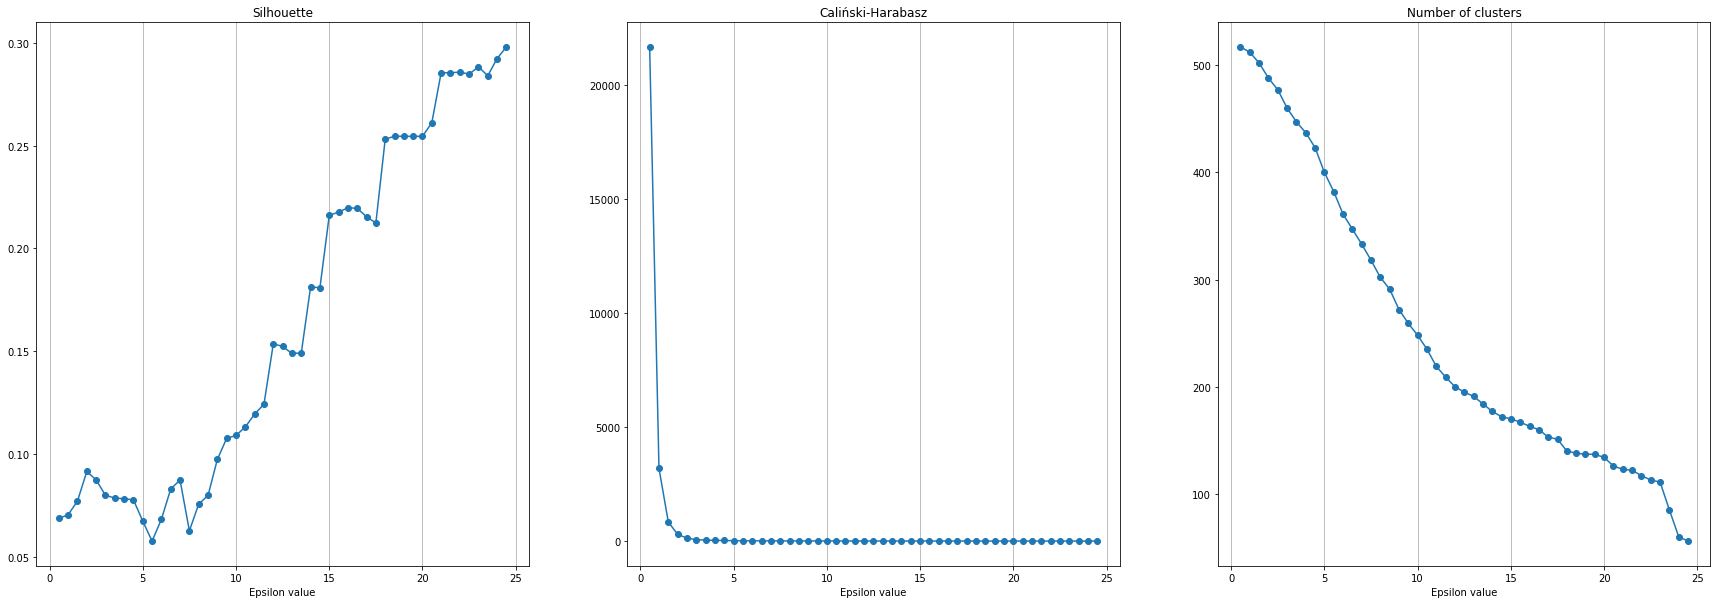

In [ ]:
#DBSCAN min sample 1
#Preliminary search for proper epsilon, we take min_samples=1 because we expect outliers
silhouette = []
harabasz = []
n_clusters = []
epsilons = [0.001, 0.01, 0.1, 1, 10, 25, 37.5]
for e in epsilons:
  np.random.seed(1234)
  clustering = DBSCAN(eps=e, min_samples=1, metric='euclidean').fit(cocktails)
  silhouette.append(silhouette_score(cocktails, labels=clustering.labels_,
                                     metric='euclidean'))
  harabasz.append(calinski_harabasz_score(cocktails, labels=clustering.labels_))
  n_clusters.append(len(list(set(clustering.labels_))))


# clustering.labels_
print('silhouette: ', silhouette)
print('harabasz: ', harabasz)
print('n_clusters: ', n_clusters)
#DBSCAN
#Search for proper epsilon
silhouette = []
harabasz = []
n_clusters = []
epsilons = list(np.arange(0.5,25,0.5))
for e in epsilons:
  np.random.seed(1234)
  clustering = DBSCAN(eps=e, min_samples=1, metric='euclidean').fit(cocktails)
  silhouette.append(silhouette_score(cocktails, labels=clustering.labels_,
                                     metric='euclidean'))
  harabasz.append(calinski_harabasz_score(cocktails, labels=clustering.labels_))
  n_clusters.append(len(list(set(clustering.labels_))))
#measures
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.plot(epsilons, silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')

plt.subplot(1, 3, 2)
plt.plot(epsilons, harabasz, marker='o')
plt.title('Caliński-Harabasz')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')
plt.subplot(1, 3, 3)
plt.plot(epsilons, n_clusters, marker='o')
plt.title('Number of clusters')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')
plt.show()


In case of DBSCAN with min_samples=1 we can see that Caliński-Harabasz metric decays exponentially. This is a sign that we may not have the best fit for mins_samples=1.
If we were to use elbow method we arrive at eps=1.5 which corresponds to around 500 clusters. Recall that we have 545 observations in our data set - which based on Pigeon Hole principle leads to a conclusion that we achevie almost only singletons.

In [ ]:
#DBSCAN
#Preliminary search for proper epsilon, we take min_samples=1 because we expect outliers
silhouette = []
harabasz = []
n_clusters = []
epsilons = [0.001, 0.01, 0.1, 1, 10, 25, 37.5]
for e in epsilons:
  np.random.seed(1234)
  clustering = DBSCAN(eps=e, min_samples=2, metric='euclidean').fit(cocktails)
  silhouette.append(silhouette_score(cocktails, labels=clustering.labels_,
                                     metric='euclidean'))
  harabasz.append(calinski_harabasz_score(cocktails, labels=clustering.labels_))
  n_clusters.append(len(list(set(clustering.labels_))))


# clustering.labels_
print('silhouette: ', silhouette)
print('harabasz: ', harabasz)
print('n_clusters: ', n_clusters)

silhouette:  [-0.3265373897002844, -0.3265373897002844, -0.31842189239344154, -0.29081256200797007, 0.030801647213776366, 0.3780730831066246, 0.484808387077604]
harabasz:  [0.7908103027884666, 0.7908103027884666, 0.7521538772887446, 0.5928274178315583, 1.7463837944736795, 3.930722513747679, 5.276481675680679]
n_clusters:  [9, 9, 11, 15, 21, 2, 2]


In [ ]:
#DBSCAN
#Search for proper epsilon
silhouette = []
harabasz = []
n_clusters = []
epsilons = list(np.arange(0.5,25,0.5))
for e in epsilons:
  np.random.seed(1234)
  clustering = DBSCAN(eps=e, min_samples=2, metric='euclidean').fit(cocktails)
  silhouette.append(silhouette_score(cocktails, labels=clustering.labels_,
                                     metric='euclidean'))
  harabasz.append(calinski_harabasz_score(cocktails, labels=clustering.labels_))
  n_clusters.append(len(list(set(clustering.labels_))))


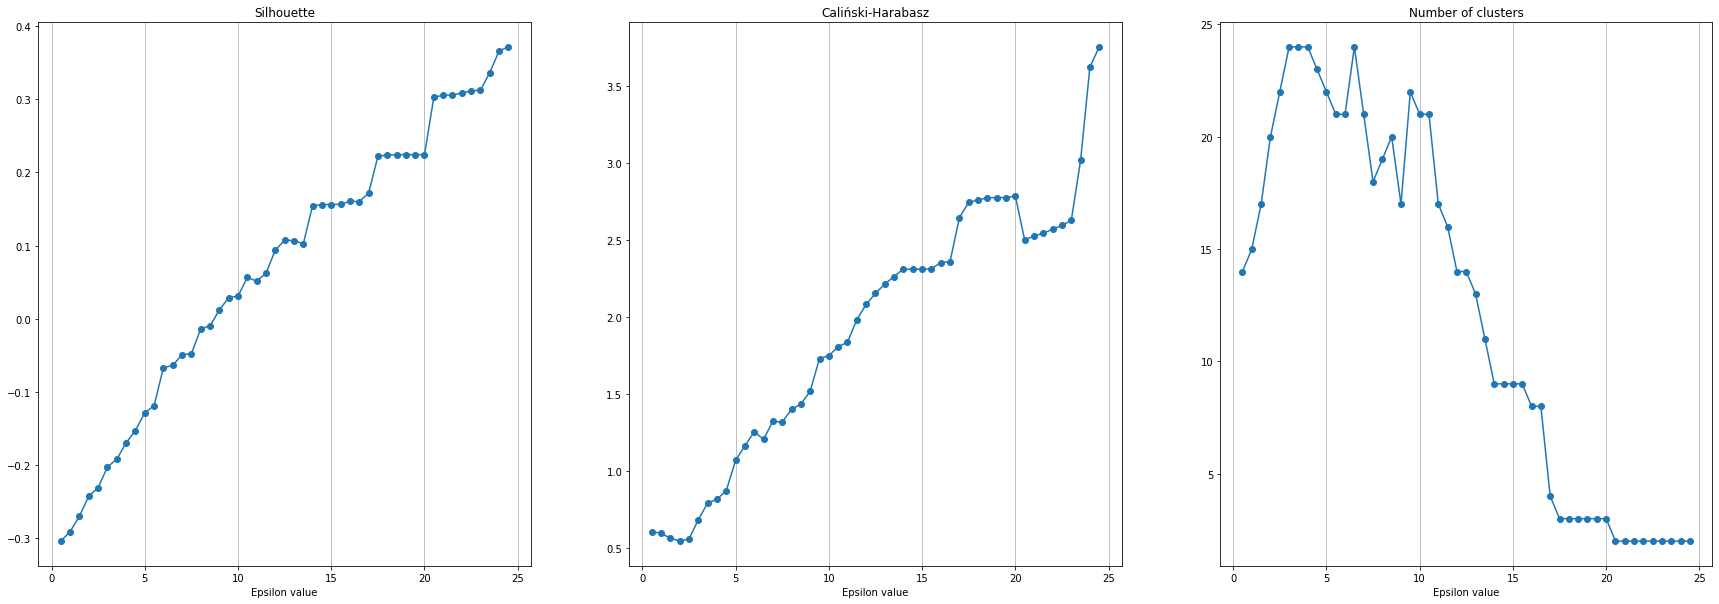

In [ ]:
#measures
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.plot(epsilons, silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')

plt.subplot(1, 3, 2)
plt.plot(epsilons, harabasz, marker='o')
plt.title('Caliński-Harabasz')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')
plt.subplot(1, 3, 3)
plt.plot(epsilons, n_clusters, marker='o')
plt.title('Number of clusters')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')
plt.show()

In the case of DBSCAN with min_samples=2 we can see upwards trends in both Silhouette and Caliński-Harabasz measures. As far as the number of clusters goes we see expected decrease in number of clusters as ɛ increses.

We arrive at a optimisation problem which is rather hard to solve. We take into account two measures and number of clusters. If we follow the plateau method we arrive at ɛ=20 and only 2 clusters which is an undesired result. 

In order to keep the number of clusters relativly high and have a better comparison with PAM algorithm we can choose ɛ=10 which yields number of clusters 21, positive Silhouette measure and median value of Caliński-Harabasz measure.

0.030801647213776366
1.7463837944736795


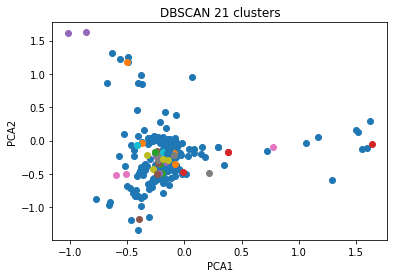

In [ ]:
#Visualisation
np.random.seed(1234)
clustering = DBSCAN(eps=10, min_samples=2, metric='euclidean').fit(cocktails)
label = clustering.labels_
pca = PCA(n_components=2)
cocktails_pca = pca.fit_transform(cocktails)
cocktails_pca = pd.DataFrame(cocktails_pca)
cocktails_pca['label'] = label
print(silhouette_score(cocktails, labels=clustering.labels_, metric='euclidean'))
print(calinski_harabasz_score(cocktails, labels=clustering.labels_))

for i in range(0,21):
  plt.scatter(cocktails_pca.loc[cocktails_pca.label==i,0],
              cocktails_pca.loc[cocktails_pca.label==i,1], label=i)
# plt.legend()
plt.title("DBSCAN 21 clusters")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
proportions = []
for i in range(0,20):
  proportions.append(cocktails_pca[(cocktails_pca['label'] ==i)]['label'].count())
print(sum(proportions))
print('number of observations in cluster,   number of such clusters')
Counter(proportions).most_common()

317
number of observations in cluster,   number of such clusters


[(2, 15), (3, 3), (274, 1), (4, 1)]

We arrive at an issue that not all of the elements are assigned to a cluster. This is caused by the min_sample=2 parameter. We should check min_sample=1 DBSCAN results.

0.07707446804944491
841.4921836069569


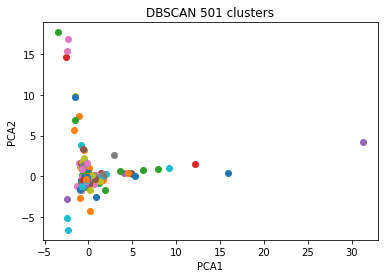

545
number of observations in cluster,   number of such clusters


[(1, 486), (2, 11), (3, 3), (23, 1), (5, 1)]

In [ ]:
#Visualisation
np.random.seed(1234)
clustering = DBSCAN(eps=1.5, min_samples=1, metric='euclidean').fit(cocktails)
label = clustering.labels_
pca = PCA(n_components=2)
cocktails_pca = pca.fit_transform(cocktails)
cocktails_pca = pd.DataFrame(cocktails_pca)
cocktails_pca['label'] = label
print(silhouette_score(cocktails, labels=clustering.labels_, metric='euclidean'))
print(calinski_harabasz_score(cocktails, labels=clustering.labels_))

for i in range(0,502):
  plt.scatter(cocktails_pca.loc[cocktails_pca.label==i,0],
              cocktails_pca.loc[cocktails_pca.label==i,1], label=i)
# plt.legend()
plt.title("DBSCAN 501 clusters")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

proportions = []
for i in range(0,502):
  proportions.append(cocktails_pca[(cocktails_pca['label'] ==i)]['label'].count())
print(sum(proportions))
print('number of observations in cluster,   number of such clusters')
Counter(proportions).most_common()


This time all of the observations has been clusterd. We obtain 486 singleton clusters and several multiple clusters. In a sense we split the central cluster seen in KMeans result into singlton clusters. 

As far as the Caliński-Harabasz metric goes we get a 100 times better result than PAM algorithm and 200 better than KMeans. The downside is the number of clusters with almost all clusters assigned as singletons. 

This analysis strongly suggest that the cocktails dataset is mostly unclusterable with only several clusters present.

In [10]:
cocktails_dict = pd.read_csv('/content/drive/MyDrive/Unsupervised Learning/cocktails_clustering/cocktails_raw.csv')
cocktails_dict = pd.read_csv('/content/drive/MyDrive/Unsupervised Learning/cocktails_clustering/cocktails_raw.csv')
cocktails_dict = list(cocktails_dict['drink'].unique())
del cocktails_dict[407]

In [ ]:
cluster_ids=[]
for i, x in enumerate(proportions):
  if x>1:
    cluster_ids.append(i)

cluster_rows=[]
for id in cluster_ids:
  cluster_rows.append(list(cocktails_pca[cocktails_pca['label']==id].index))

for id in cluster_rows[0]:
  print(cocktails_dict[id])

501 Blue
After Five
Amaretto Sweet & Sour
Black Forest Shake
Bruce's Puce
Dirty Nipple
Frappé
Gin Cooler
Holloween Punch
Jamaican Coffee
Limeade
Lone Tree Cooler
Melya
Mimosa
Pysch Vitamin Light
Screwdriver
Spiking coffee
Tequila Surprise
Thai Iced Coffee
Vodka And Tonic
Vodka Russian
Zambeer
Zoksel


### As I mentioned druing feedback session I could not finid tSNE implementation in Python which would include clustering. Therfore I use tSNE only as a visualisation tool and dimension reduction technique.

Results of visualisations are always subjective. In my opinion this visualisation is much more readable. We get seperate dots and not one cluster with two lines as before with PCA.

Presented spherical shape may suggest that there are a lot of outliers in the dataset which are long distances apart.

In [ ]:
np.random.seed(1234)
cocktails_tsne = pd.DataFrame(TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, metric='euclidean').fit_transform(cocktails))


0.05950698138811993
9.15452007577997


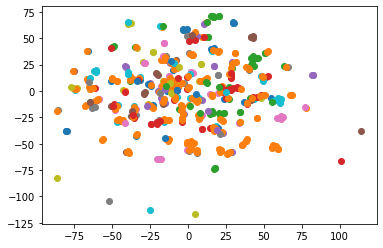

In [ ]:
cocktails_tsne['label'] = kmedoids.labels_
print(silhouette_score(cocktails, labels=kmedoids.labels_, metric='euclidean'))
print(calinski_harabasz_score(cocktails, labels=kmedoids.labels_))
for i in range(0,194):
  plt.scatter(cocktails_tsne.loc[cocktails_tsne.label==i,0],cocktails_tsne.loc[cocktails_tsne.label==i,1], label=i)
plt.show()

### Usually it is recommended to use t-SNE with previous PCA calculation.

Results of this approach, in my opinion, are worse in this case. Again we get denser kernel of the point cloud which hides some observations behind others.

In [ ]:
np.random.seed(1234)
cocktails_tsne2 = pd.DataFrame(TSNE(n_components=2, learning_rate='auto',
                  init='pca', perplexity=10, metric='euclidean').fit_transform(cocktails))


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


0.05950698138811993
9.15452007577997


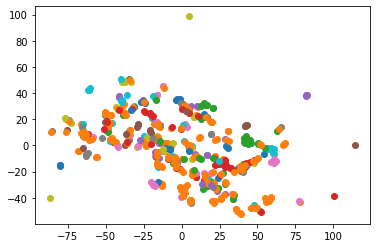

In [ ]:
cocktails_tsne2['label'] = kmedoids.labels_
print(silhouette_score(cocktails, labels=kmedoids.labels_, metric='euclidean'))
print(calinski_harabasz_score(cocktails, labels=kmedoids.labels_))
for i in range(0,194):
  plt.scatter(cocktails_tsne.loc[cocktails_tsne2.label==i,0],cocktails_tsne2.loc[cocktails_tsne2.label==i,1], label=i)
plt.show()

#Dimension Reduction

This part of the project focuses on dimension reduction methods. Cocktails data set used in this project conatins 314 features (ingredients) at the start. It is sensible to use dimension reduction techniques to lower the dimensionality for the sake of better performance of clustering algorithms.

We reload the data and remove correlated columns as before alongside observation 407.

In [4]:
#Loading data set again
cocktails = pd.read_csv('/content/drive/MyDrive/Unsupervised Learning/cocktails_clustering/cocktails_ready.csv')
cocktails = cocktails.drop(columns=["row_id"])
columns = cocktails.columns
cocktails = cocktails.drop([407],axis=0).reset_index(drop=True)
#scaling
scaler = preprocessing.StandardScaler().fit(cocktails)
cocktails = pd.DataFrame(scaler.transform(cocktails))
#removing corelated features
triangle_cor = cocktails.corr().where(np.triu(np.ones(cocktails.corr().shape),k=1).astype(bool))
cor = triangle_cor.abs().unstack().sort_values(kind="quicksort").reset_index()
dif = cor['level_0']!=cor['level_1']
filter = (dif) & (cor[0]>0.95) & (cor[0]!=np.nan)
to_drop = cor[filter].sort_values(by=[0],ascending=False)['level_0']
cocktails = cocktails.drop(to_drop, axis=1)
cocktails.shape

(545, 283)

##PCA
First method that we are going to use is Principal Component Analysis. Firstly, we will consider percentage of variance preserved by every created component.

As we can see on the graph below explained variance per component is not higher than 1.2%.

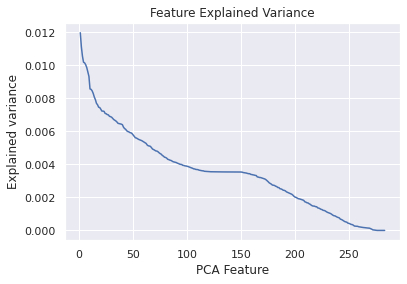

Values of first 10 PCA components:  [0.01196628 0.01111196 0.01054916 0.01018145 0.01014382 0.01002964
 0.00985655 0.00960122 0.00932726 0.00856501]


In [15]:
#DIMENSION REDUCTION 
pca = PCA(svd_solver='full')
#Transform the data
cocktails_pca = pca.fit(cocktails)
cocktails_pca.n_components_
# Plot of explained_variance
sns.set()

plt.plot(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()
print('Values of first 10 PCA components: ',pca.explained_variance_ratio_[0:10])

If we would want to preserve 90% of variance we can use first 186 PCA components. We reduce the dimensionality by almost 100 which might be benefitial for clustering algorithms.

In [5]:
#DIMENSION REDUCTION 
pca = PCA(n_components=0.9,svd_solver='full')
#Transform the data
cocktails_pca = pca.fit(cocktails)
reduced_cocktails = pca.fit_transform(cocktails)
cocktails_pca.n_components_

186

We can display the projection onto the PCA1 x PCA2 space. This looks familiar, because we used it before to visualise results of clustering algorithms above.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


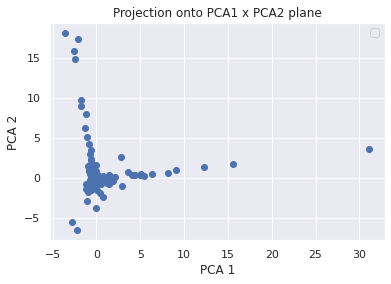

In [ ]:
cocktails_pca = pca.fit_transform(cocktails)
plot = plt.scatter(cocktails_pca[:,0], cocktails_pca[:,1])
plt.legend(handles=plot.legend_elements()[0])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Projection onto PCA1 x PCA2 plane')
plt.show()

##MDS 
Another widely used dimension reduction method is Multidimensional Scaling - a nonlinear approach suitable for finding embedded manifolds. As previously we set the metric to euclidean. In order to visualise the data we can lower number of dimensions to 2.

Figure below presenst a structuremade of shells with radial symeetry and dense core. We can suppose that the middle dense area wa sclustered by KMeans as one big clusters. At the same time outer shells can be described as outlier observations that have been classified by DBSCAN as singletone clusters.

Adding layer of colour depending on DBSACN clustering does not reveal any insteresting patterns.

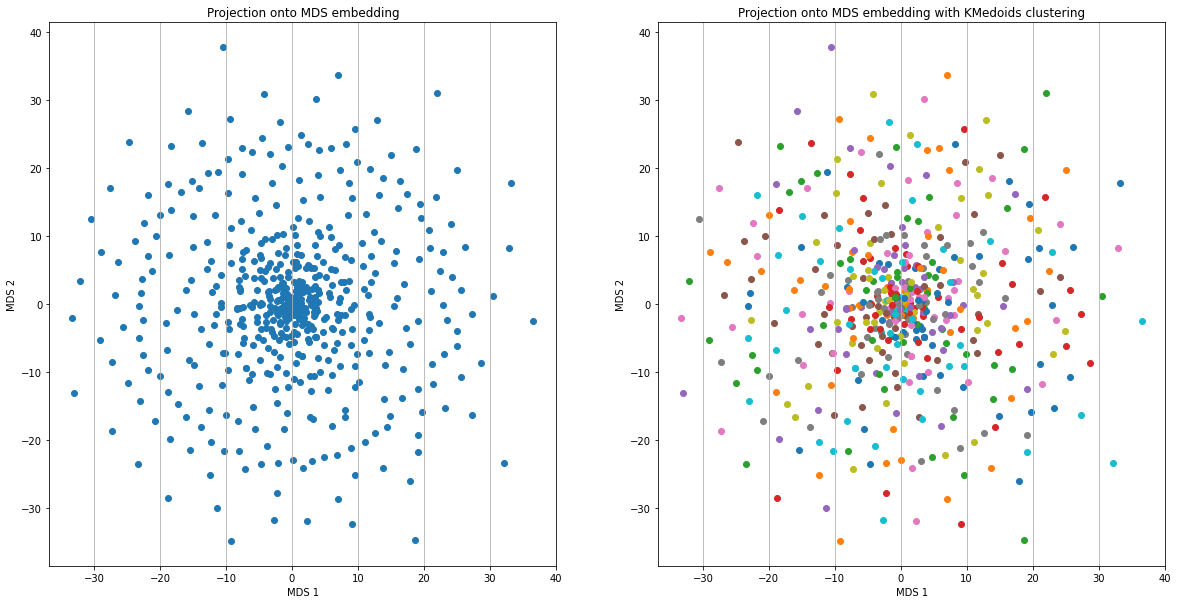

In [ ]:
# MDS to 2d
embedding = MDS(n_components=2, random_state=1234, dissimilarity='euclidean')
cocktails_mds = embedding.fit_transform(cocktails)
#MDS visualisation
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(cocktails_mds[:,0], cocktails_mds[:,1])
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('Projection onto MDS embedding')
plt.grid(axis = 'x')

plt.subplot(1, 2, 2)
cocktails_mds = pd.DataFrame(cocktails_mds)
cocktails_mds['label'] = clustering.labels_

for i in range(0,503):
  plt.scatter(cocktails_mds.loc[cocktails_mds.label==i,0],cocktails_mds.loc[cocktails_mds.label==i,1], label=i)

plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('Projection onto MDS embedding with KMedoids clustering')
plt.grid(axis = 'x')
plt.show()

# tSNE

### In case of the tSNE algorithm the results are simmilar to ones in the previous section.




0.11646760458102008
19636.5657788576


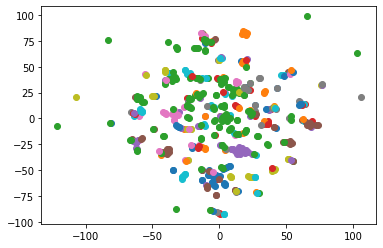

In [13]:
np.random.seed(1234)
cocktails_tsne = pd.DataFrame(TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, metric='euclidean').fit_transform(cocktails))

cocktails_tsne['label'] = kmedoids.labels_
print(silhouette_score(cocktails, labels=kmedoids.labels_, metric='euclidean'))
print(calinski_harabasz_score(cocktails, labels=kmedoids.labels_))
for i in range(0,194):
  plt.scatter(cocktails_tsne.loc[cocktails_tsne.label==i,0],cocktails_tsne.loc[cocktails_tsne.label==i,1], label=i)
plt.show()

#Clustering after DR
We can use dimension reduced data set to perform clustering methods once again.
The reduced_cocktails dataset contains 186 PCA features which explain more than 90% of the variance of the initial data.

##KMeans 
Implementation of KMeans to see if the clustering improves.

In [ ]:
#Kmeans
silhouette = []
harabasz = []

for k in range(2,200):
    np.random.seed(1234)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_cocktails)
    silhouette.append(silhouette_score(reduced_cocktails, labels=kmeans.labels_, 
                                       metric='euclidean'))
    harabasz.append(calinski_harabasz_score(reduced_cocktails, labels=kmeans.labels_))


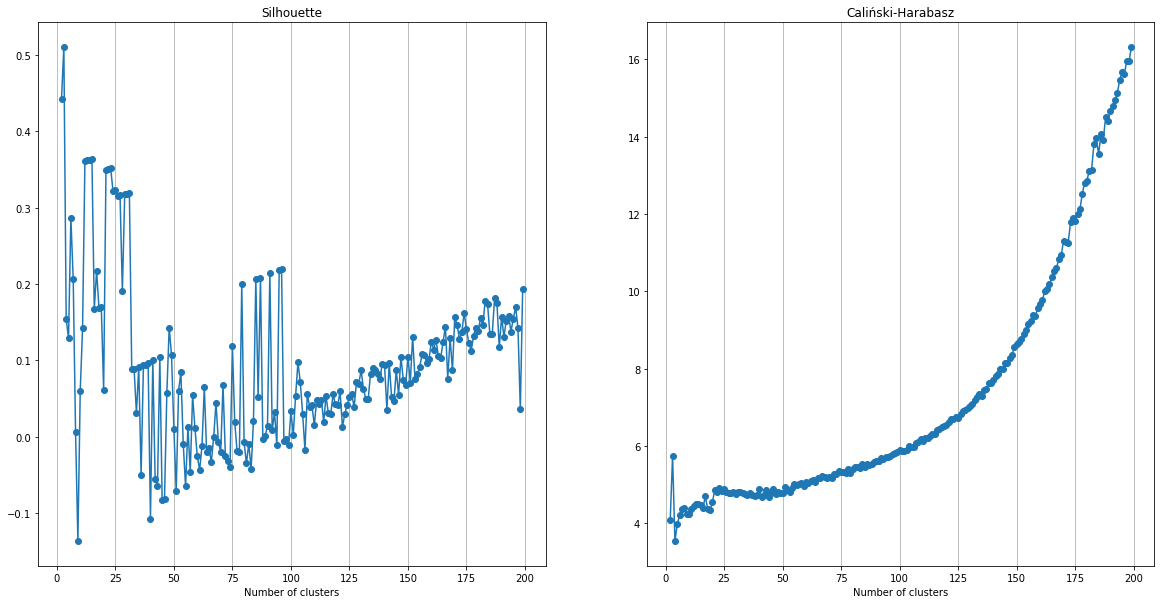

In [ ]:
#KMeans measures
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(range(2,200), silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.grid(axis = 'x')

plt.subplot(1, 2, 2)
plt.plot(range(2,200), harabasz, marker='o')
plt.title('Caliński-Harabasz')
plt.xlabel('Number of clusters')
plt.grid(axis = 'x')
plt.show()

As there is no significant cutoff point to choose k in this case we need to choose it more arbitrarily. We can shoose k=175 as relativly stable value of Silhouette before increase in its variance.

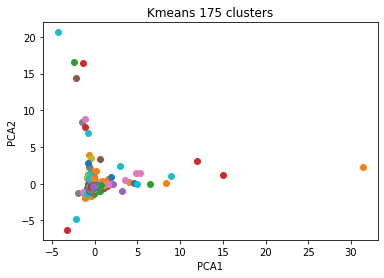

In [9]:
#Visualisation of chosen k
np.random.seed(1234)
kmeans = KMeans(n_clusters=175)
label = kmeans.fit_predict(reduced_cocktails)
pca = PCA(n_components=2)
cocktails_pca = pca.fit_transform(reduced_cocktails)
cocktails_pca = pd.DataFrame(cocktails_pca)
cocktails_pca['label'] = label

for i in range(0,175):
  plt.scatter(cocktails_pca.loc[cocktails_pca.label==i,0],
              cocktails_pca.loc[cocktails_pca.label==i,1], label=i)
plt.title("Kmeans 175 clusters")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### Even after diimension reduction the algorithm is sensitive to outliers.

Calculation below shows that there is one center cluster with 246 observations and 134 singleton outliers. This suggest that some cokctails are too close in euclidean metric for Kmeans to differentiate between them.

In [21]:
proportions = []
for i in range(0,175):
  proportions.append(cocktails_pca[(cocktails_pca['label'] ==i)]['label'].count())
print(sum(proportions))
print('number of observations in cluster,   number of such clusters')
Counter(proportions).most_common()

545
number of observations in cluster,   number of such clusters


[(1, 134),
 (2, 18),
 (3, 10),
 (4, 6),
 (246, 1),
 (17, 1),
 (27, 1),
 (7, 1),
 (8, 1),
 (5, 1),
 (11, 1)]

##DBSCAN
Implementation of DBSCAN to see if the clustering improves.

In [29]:
#DBSCAN
#Preliminary search for proper epsilon, we take min_samples=1 because we expect outliers
silhouette = []
harabasz = []
n_clusters = []
epsilons = [0.001, 0.01, 0.1, 1, 10, 25]
for e in epsilons:
  np.random.seed(1234)
  clustering = DBSCAN(eps=e, min_samples=2, metric='euclidean').fit(reduced_cocktails)
  silhouette.append(silhouette_score(reduced_cocktails, labels=clustering.labels_,
                                     metric='euclidean'))
  harabasz.append(calinski_harabasz_score(reduced_cocktails, labels=clustering.labels_))
  n_clusters.append(len(list(set(clustering.labels_))))


# clustering.labels_
print('silhouette: ', silhouette)
print('harabasz: ', harabasz)
print('n_clusters: ', n_clusters)

silhouette:  [-0.35043208609392296, -0.35043208609392296, -0.3423776654774193, -0.30120546659305764, 0.06875057829298724, 0.43783608168348187]
harabasz:  [0.766085203533537, 0.766085203533537, 0.6958230882280543, 0.5059614392508404, 2.183703720638765, 4.451883095105758]
n_clusters:  [9, 9, 11, 16, 15, 2]


In [31]:
#DBSCAN
#Search for proper epsilon
silhouette = []
harabasz = []
n_clusters = []
epsilons = list(np.arange(1,10,0.1))
for e in epsilons:
  np.random.seed(1234)
  clustering = DBSCAN(eps=e, min_samples=2, metric='euclidean').fit(reduced_cocktails)
  silhouette.append(silhouette_score(reduced_cocktails, labels=clustering.labels_,
                                     metric='euclidean'))
  harabasz.append(calinski_harabasz_score(reduced_cocktails, labels=clustering.labels_))
  n_clusters.append(len(list(set(clustering.labels_))))


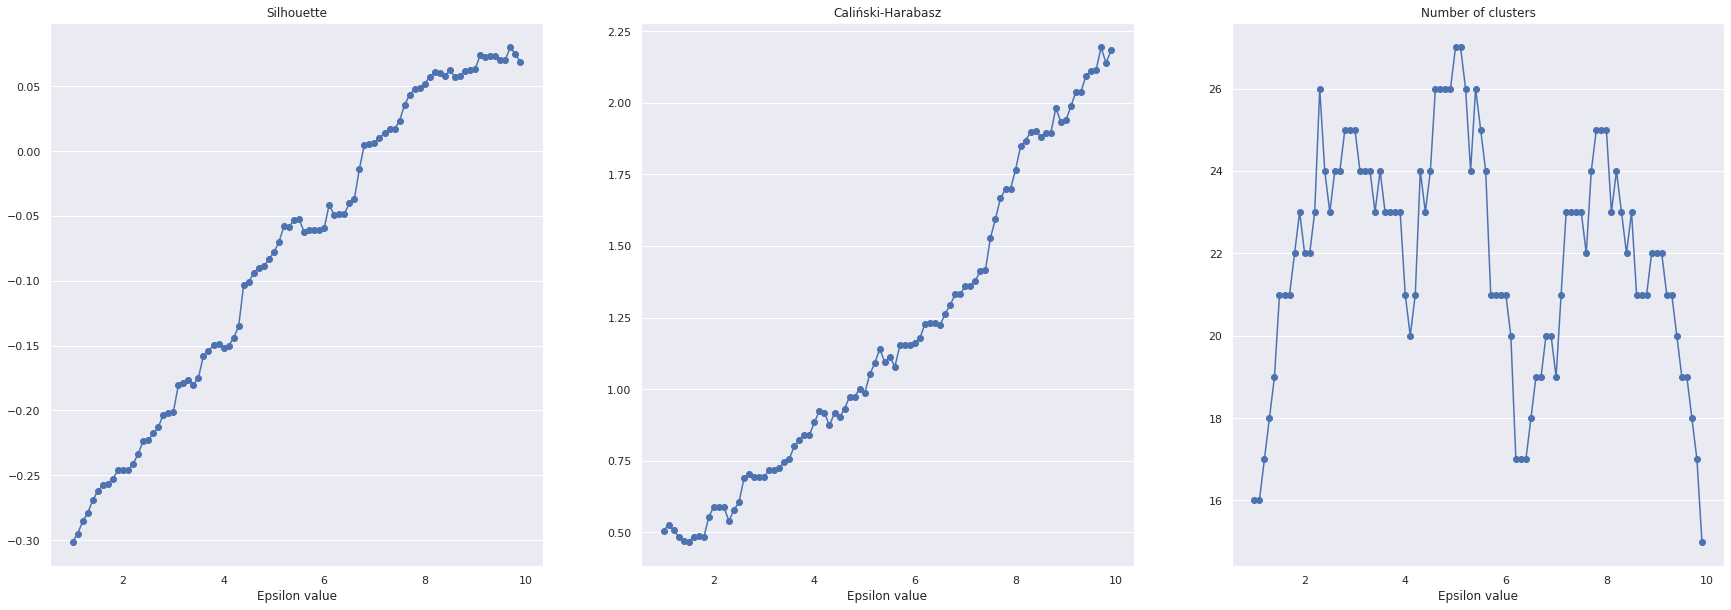

In [32]:
#measures
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.plot(epsilons, silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')

plt.subplot(1, 3, 2)
plt.plot(epsilons, harabasz, mark2er='o')
plt.title('Caliński-Harabasz')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')
plt.subplot(1, 3, 3)
plt.plot(epsilons, n_clusters, marker='o')
plt.title('Number of clusters')
plt.xlabel('Epsilon value')
plt.grid(axis = 'x')
plt.show()

### Very interesting pattern emerges in number of clusters - fractal-like.

Concidering both Silhouette and Caliński-Harabasz and high number of clusters we can choose epsilon 8.2.

It is worth noting, that again we get a constant increase in both guidline metrics with increasing value of epsilon. Although pure performance is very tempting we need to keep in mind that low number of clusters is trivial and uninteresing.

What is remarcable we get two central clusters which is a worse result than the one withour dimension reduction in a scence that we know that more complex structures can be found in this dataset in the analysis above.

0.03779940579300316
1.8478555403242585


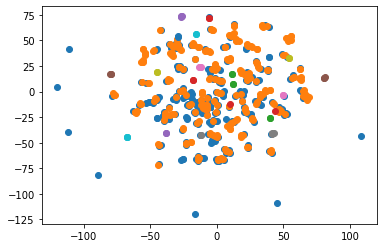

545
number of observations in cluster,   number of such clusters


[(2, 16), (3, 6), (211, 1), (284, 1)]

In [25]:
np.random.seed(1234)
dbscan = DBSCAN(eps=8.2, min_samples=2, metric='euclidean').fit(reduced_cocktails)

np.random.seed(1234)
cocktails_tsne = pd.DataFrame(TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, metric='euclidean').fit_transform(cocktails))

cocktails_tsne['label'] = dbscan.labels_
print(silhouette_score(cocktails, labels=dbscan.labels_, metric='euclidean'))
print(calinski_harabasz_score(cocktails, labels=dbscan.labels_))
for i in range(-1,23):
  plt.scatter(cocktails_tsne.loc[cocktails_tsne.label==i,0],cocktails_tsne.loc[cocktails_tsne.label==i,1], label=i)
plt.show()

proportions = []
for i in range(-1,23):
  proportions.append(cocktails_tsne[(cocktails_tsne['label'] ==i)]['label'].count())
print(sum(proportions))
print('number of observations in cluster,   number of such clusters')
Counter(proportions).most_common()

# Summary

The analysis performed on dataset of cocktail recepies displays one crucial aspect of unsupervised learning methods, in particular in clustering methods.

Metrics are necesseray to have an objective and quantitative way of comparing results among infinite space of possible algorithms and methods. 

Nevertheless, metrics might be confusing and not aligned with the exact objective of the analysis. It might be the case that models with lower metric values perform 'better' in the subjective opinion of either the creator or the consumer. 

In conclusion, we need to be very careful and patient with these kinds of methods. We should try as many parameter configurations as possible and analyse results with experts' knowledge. Keeping in mind thata sometimes less is more.